ЛАБОРАТОРНАЯ РАБОТА 2.2. Приближение табличных функций сплайнами и МНК.

Квадратичный сплайн, узлы интерполяции совпадают с узлами сплайна (одна сетка).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ООФ: интервал от -2 до бесконечности
def f(x):
    return x ** 2 - np.sqrt(np.log10(x+3))

In [3]:
#ООФ: любые числа
def g(x):
    return x ** 3-0.2 * x ** 2 + 0.4 * abs(x) + 1.4

In [4]:
#Границы отрезка и количество узлов
a = -1.5
b = 1.5
n = 10

In [5]:
def nodes(a, b, n, f): 
    ''' Функция возвращает x_list - сетку и y_list - сеточную функцию
        a и b - границы отрезка,
        n - количество точек,
        f - функция ''' 
    x_list = np.linspace(a, b, n)
    y_list = np.zeros(n)
    for i in range(n):
        y_list[i] += f(x_list[i])
    return [x_list, y_list]

In [6]:
def quadratic_spline_interpolation(x_list, y_list, initial_derivative):
    ''' Функция строит сплайны для интерполяции функции
        x_list - сетка
        y_list - сеточка функция
        
        Функция возвращает splines - массив квадратичных функций '''
    
    n = len(x_list) - 1  # Количество интервалов
    h = np.diff(x_list)  # Расстояния между узлами
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    
    # Коэффициенты c 
    c = y_list
    
    # Рекуррентные соотношения для коэффициентов a и b
    b[0] = initial_derivative
    for i in range(1, n):
        b[i] = 2 * (y_list[i] - y_list[i-1]) / h[i-1] - b[i-1]
    
    for i in range(n):
        a[i] = (y_list[i+1] - y_list[i] - b[i] * h[i]) / h[i]**2
    
    # Создание сплайнов
    splines = []
    for i in range(n):
        def spline(x, i=i, a=a, b=b, c=c, x_list=x_list):
            return a[i] * (x - x_list[i])**2 + b[i] * (x - x_list[i]) + c[i]
        splines.append(spline)
    
    return splines

In [7]:
def interpolation_error(x_list, y_list, f, initial_derivative,  num_points=100):
    splines = quadratic_spline_interpolation(x_list, y_list, initial_derivative)
    
    x_error = np.array([])
    y_error = np.array([])
    
    for i in range(len(x_list) - 1):
        x = np.linspace(x_list[i], x_list[i + 1], num_points)
        y_true = f(x)
        y_interp = splines[i](x)
        error = np.abs(y_true - y_interp)
        x_error = np.concatenate((x_error, x))
        y_error = np.concatenate((y_error, error))
    
    return [x_error, y_error]

In [8]:
def max_error_from_nodes(f, nod, initial_derivative):
    grids = list()
    grid_funcs = list()
    errors = np.zeros(len(nod))
    for i in nod:
        x_list, y_list = nodes(a, b, i, f)
        grids.append(x_list)
        grid_funcs.append(y_list)
    for i in range(len(nod)):
        errors[i] += np.max(interpolation_error(grids[i], grid_funcs[i], f, initial_derivative, num_points=100)[1])
    
    return errors

In [9]:
def max_error_from_derivative(f, nod, derivetives):
    x_list, y_list = nodes(a, b, nod, f)
    errors = np.zeros(len(derivetives))
    for i in range(len(derivetives)):
        errors[i] += np.max(interpolation_error(x_list, y_list, f, derivetives[i], num_points=100)[1])
    
    return errors

In [10]:
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

In [11]:
test_grid = np.linspace(a, b, 1000)
nod = np.arange(5, 100)
nodes_for_research = [5, 7, 10]
colors = ['red', 'green', 'yellow', 'yellow', 'red', 'green', 'yellow', 'yellow', 'red', 'green', 'yellow', 'yellow']

In [12]:
initial_derivative = 0

Text(0.5, 1.0, 'Поточечная ошибка для g(x)')

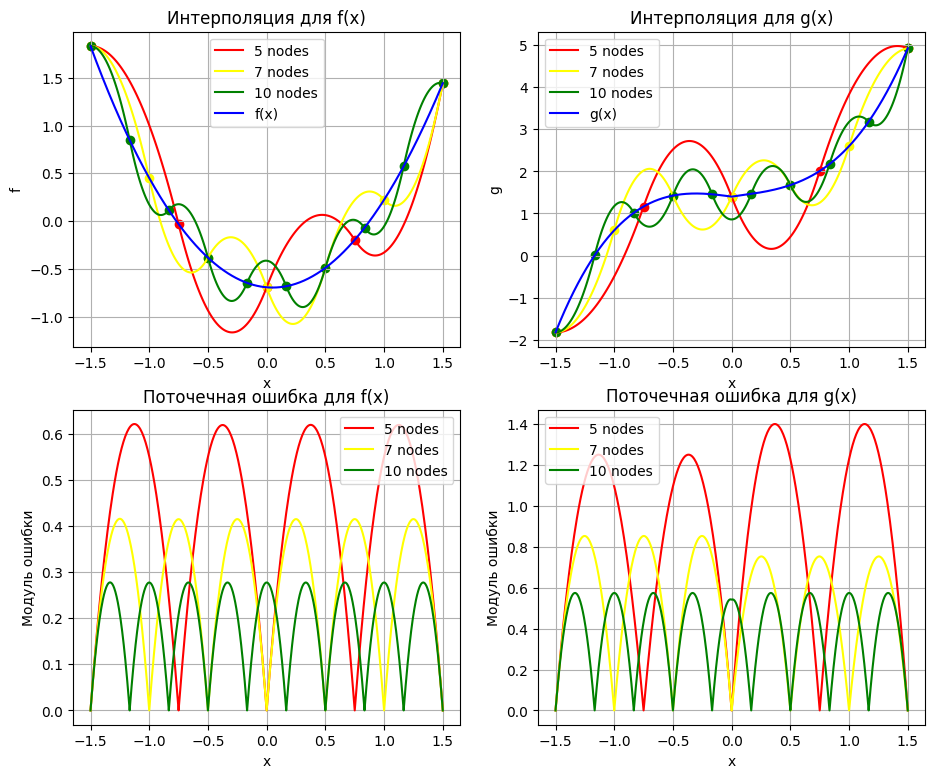

In [13]:
plt.figure(figsize=(11, 9))
#plt.suptitle('Исследование интерполяции квадратичными сплайнами', fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 1)
for i in nodes_for_research :
    x_list, y_list = nodes(a, b, i, f)
    splines = quadratic_spline_interpolation(x_list, y_list, initial_derivative)
    for j in range(len(x_list) - 1):
        x_vals = np.linspace(x_list[j], x_list[j+1], 100)
        y_vals = splines[j](x_vals)
        plt.plot(x_vals, y_vals, color = colors[i - 1])
    plt.plot(x_list[i - 1], y_list[i - 1], color = colors[i - 1], label = f"{len(x_list)} nodes")
    plt.scatter(x_list, y_list, color = colors[i - 1])


plt.plot(test_grid, f(test_grid), label = 'f(x)', color = 'blue')
plt.legend()
plt.grid('True')
plt.xlabel('x')
plt.ylabel('f')
plt.title('Интерполяция для f(x)')

plt.subplot(2, 2, 2)
for i in nodes_for_research:
    x_list, y_list = nodes(a, b, i, g)
    splines = quadratic_spline_interpolation(x_list, y_list, initial_derivative)
    for j in range(len(x_list) - 1):
        x_vals = np.linspace(x_list[j], x_list[j+1], 100)
        y_vals = splines[j](x_vals)
        plt.plot(x_vals, y_vals, color = colors[i - 1])
    plt.plot(x_list[i - 1], y_list[i - 1], color = colors[i - 1], label = f"{len(x_list)} nodes")
    plt.scatter(x_list, y_list, color = colors[i - 1])

plt.plot(test_grid, g(test_grid), label = 'g(x)', color = 'blue')
plt.legend()
plt.grid('True')
plt.xlabel('x')
plt.ylabel('g')
plt.title('Интерполяция для g(x)')

plt.subplot(2, 2, 3)
for i in nodes_for_research:
    x_list, y_list = nodes(a, b, i, f)
    error_x, error_y = interpolation_error(x_list, y_list, f, initial_derivative, num_points=100)
    plt.plot(error_x, error_y, label = f'{i} nodes', color = colors[i - 1])
plt.grid('True')
plt.xlabel('x')
plt.legend()
plt.ylabel('Модуль ошибки')
plt.title('Поточечная ошибка для f(x)')

plt.subplot(2, 2, 4)
for i in nodes_for_research:
    x_list, y_list = nodes(a, b, i, g)
    error_x, error_y = interpolation_error(x_list, y_list, g, initial_derivative, num_points=100)
    plt.plot(error_x, error_y, label = f'{i} nodes', color = colors[i - 1])
plt.grid('True')
plt.xlabel('x')
plt.legend()
plt.ylabel('Модуль ошибки')
plt.title('Поточечная ошибка для g(x)')


In [14]:
errors_f_from_nodes = max_error_from_nodes(f, nod, initial_derivative)
errors_g_from_nodes = max_error_from_nodes(g, nod, initial_derivative)

Text(0.5, 1.0, 'Функция g(x)')

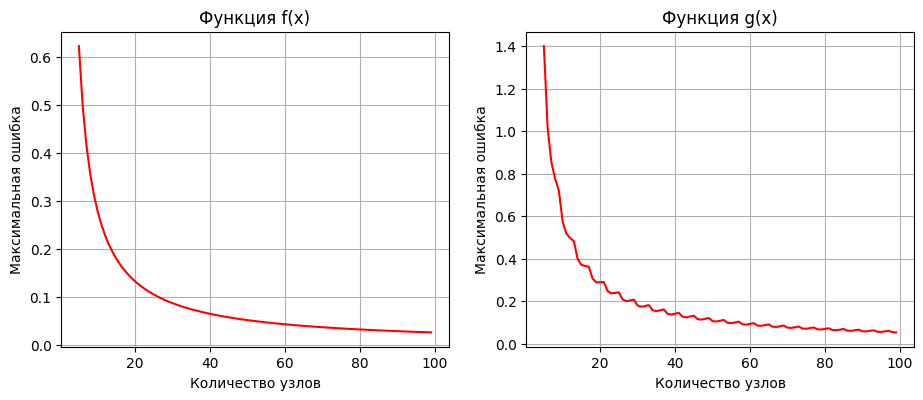

In [15]:
plt.figure(figsize=[11, 9])

#plt.suptitle('Зависимость максимальной ошибки на отрезке от числа узлов', fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(nod, errors_f_from_nodes, color = 'red')
plt.grid('True')
plt.xlabel('Количество узлов')
plt.ylabel('Максимальная ошибка')
plt.title('Функция f(x)')

plt.subplot(2,2,2)
plt.plot(nod, errors_g_from_nodes, color = 'red')
plt.grid('True')
plt.xlabel('Количество узлов')
plt.ylabel('Максимальная ошибка')
plt.title('Функция g(x)')

In [16]:
derivatives_f = np.linspace(derivative(f, a), 0, 1000)
derivatives_g = np.linspace(derivative(g, a), 0, 1000)

In [17]:
derivative(g, a)

6.949953000168207

In [18]:
errors_f_from_derivative = max_error_from_derivative(f, 10, derivatives_f)
errors_g_from_derivative = max_error_from_derivative(g, 10, derivatives_g)

Text(0.5, 1.0, 'Функция g(x)')

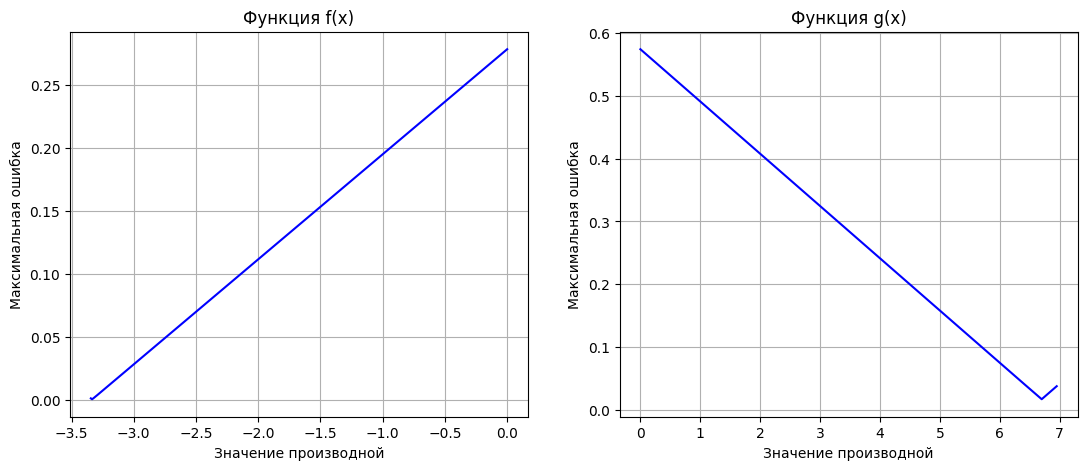

In [19]:
plt.figure(figsize=[13, 11])

#plt.suptitle('Зависимость максимальной ошибки в зависимости от значения производной на левом крае отрезка', fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
plt.plot(derivatives_f, errors_f_from_derivative, color = 'blue')
plt.grid('True')
plt.xlabel('Значение производной')
plt.ylabel('Максимальная ошибка')
plt.title('Функция f(x)')

plt.subplot(2,2,2)
plt.plot(derivatives_g, errors_g_from_derivative, color = 'blue')
plt.grid('True')
plt.xlabel('Значение производной')
plt.ylabel('Максимальная ошибка')
plt.title('Функция g(x)')

ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ

In [20]:
noise_levels = [1, 2, 3, 4, 5]
num_experiments = 20

In [21]:
x_f_list, y_f_list = nodes(a, b, 30, f)
x_g_list, y_g_list = nodes(a, b, 30, g)

In [22]:
def relative_error(x_list, f, noisy_spline, num_points=500):
    true_values = []
    noisy_spline_values = []
    for i in range(len(x_list) - 1):
        x = np.linspace(x_list[i], x_list[i + 1], num_points)
        true_values.append(f(x))
        noisy_spline_values.append(noisy_spline[i](x))
    true_values = np.array(true_values)
    noisy_spline_values = np.array(noisy_spline_values)
    return np.max(np.abs(true_values - noisy_spline_values)) / np.max(true_values)

def create_noise(data, max_noise_persent):
    noise = np.random.uniform(-max_noise_persent/100, max_noise_persent/100, data.shape)
    return data * (1 + noise)

In [23]:
results_f = {level: [] for level in noise_levels}
results_g = {level: [] for level in noise_levels}

In [24]:
for level in noise_levels:
    for _ in range(num_experiments):
        noisy_values = create_noise(y_f_list, level)
        noisy_spline = quadratic_spline_interpolation(x_f_list, noisy_values, 0)
        true_fine_values = f(x_f_list)
        error = 100 * relative_error(x_f_list, f, noisy_spline)
        results_f[level].append(error)

        noisy_values = create_noise(y_g_list, level)
        noisy_spline = quadratic_spline_interpolation(x_g_list, noisy_values, 0)
        true_fine_values = g(x_g_list)
        error = 100 * relative_error(x_g_list, g, noisy_spline)
        results_g[level].append(error)

Text(0.5, 1.0, 'Функция g(x)')

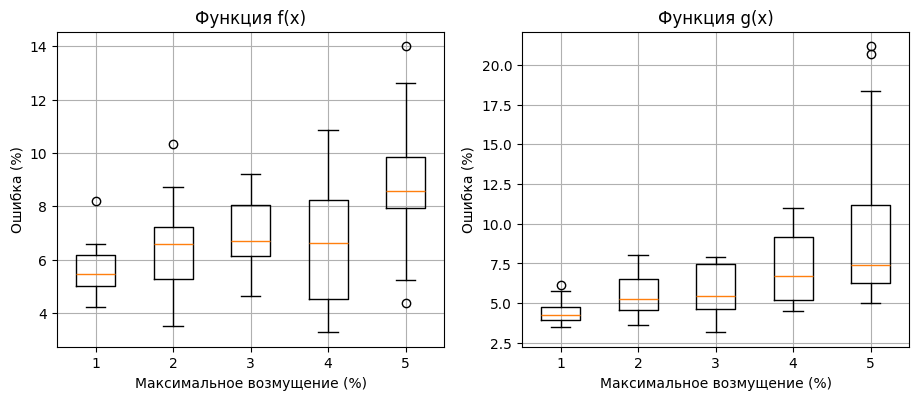

In [25]:
plt.figure(figsize=(11, 9))

#plt.suptitle('Зависимость ошибки интерполяции при возмущении данных')
plt.subplot(2,2,1)

plt.boxplot([results_f[level] for level in noise_levels]);
plt.grid('True')
plt.xlabel('Максимальное возмущение (%)')
plt.ylabel('Ошибка (%)')
plt.title('Функция f(x)')

plt.subplot(2,2,2)

plt.boxplot([results_g[level] for level in noise_levels]);
plt.grid('True')
plt.xlabel('Максимальное возмущение (%)')
plt.ylabel('Ошибка (%)')
plt.title('Функция g(x)')
